To preprocess an image for identifying the best biopsy region, you typically want to enhance features and details that might indicate areas of interest. Here's a basic workflow for preprocessing images in this context:

Load and Resize Image: Ensure the image is loaded and resized to a consistent size suitable for your analysis.

Convert to Grayscale: If the analysis does not require color, converting the image to grayscale can simplify processing and focus on intensity variations.

Apply Gaussian Blur: To reduce noise and smooth the image, which can help in better feature extraction.

Histogram Equalization: Enhance the contrast of the image to make features more distinguishable.

Edge Detection: Use edge detection to highlight the boundaries and contours of potential regions of interest.

Thresholding: Apply a threshold to separate regions of interest from the background.

Morphological Operations: Use operations like dilation and erosion to refine the areas identified by thresholding.

Region of Interest Extraction: Identify and extract the regions that have the potential to be the best biopsy regions based on certain criteria or features.



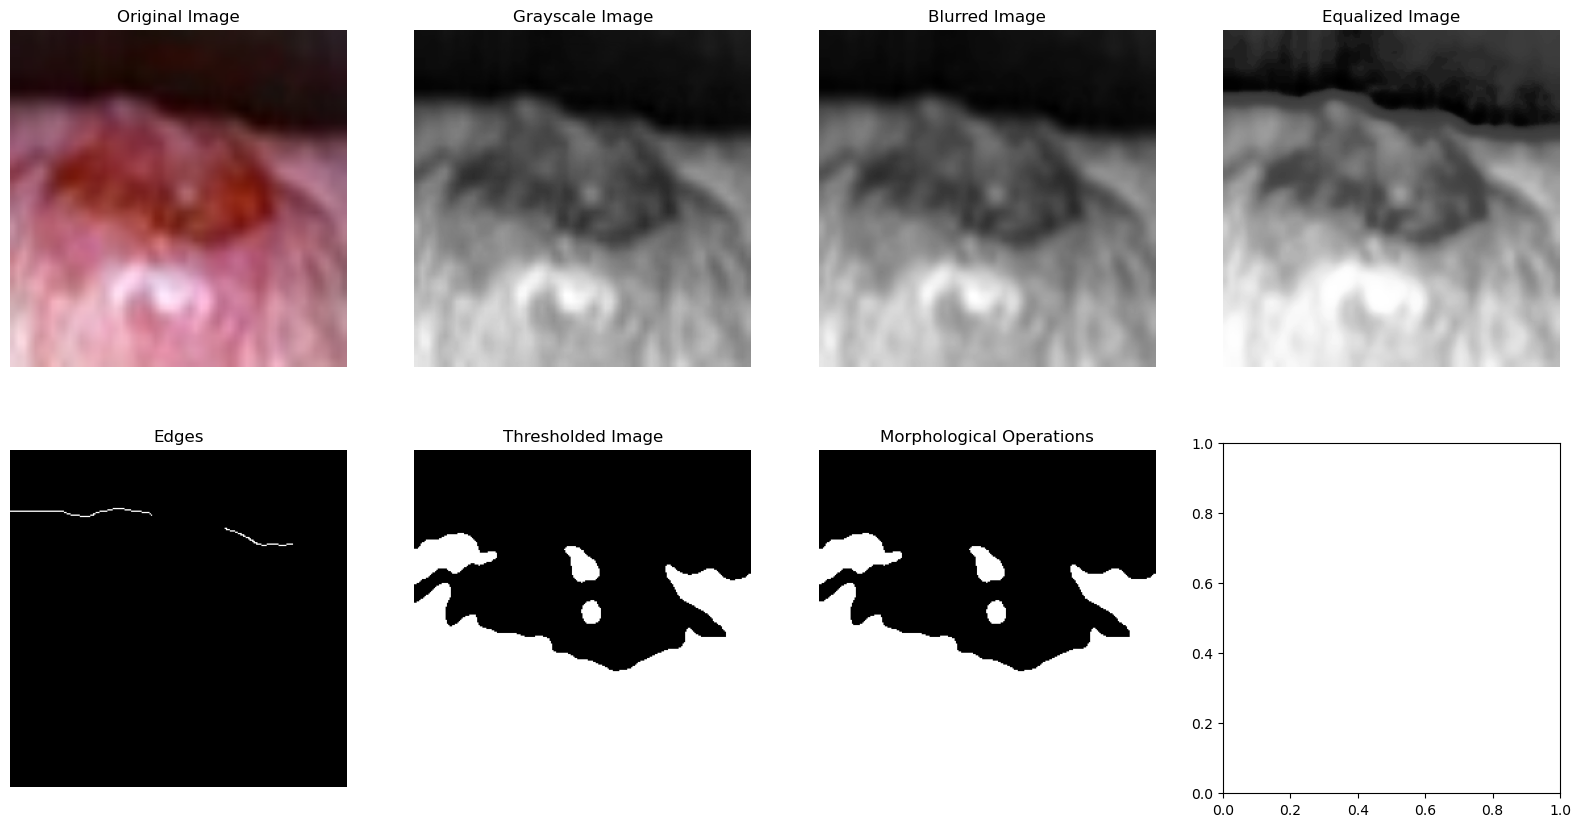

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load an image from a file path."""
    return cv2.imread(image_path)

def resize_image(image, size=(256, 256)):
    """Resize the image to the specified size."""
    return cv2.resize(image, size)

def convert_to_grayscale(image):
    """Convert the image to grayscale."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """Apply Gaussian blur to the image."""
    return cv2.GaussianBlur(image, kernel_size, 0)

def histogram_equalization(image):
    """Apply histogram equalization to enhance contrast."""
    return cv2.equalizeHist(image)

def edge_detection(image):
    """Apply Canny edge detection."""
    return cv2.Canny(image, 100, 200)

def thresholding(image, threshold_value=127):
    """Apply binary thresholding to separate regions of interest."""
    _, thresh_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

def morphological_operations(image):
    """Apply morphological operations to refine regions."""
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    return eroded

def plot_image(image_array, title="Image"):
    """Plot an image using matplotlib."""
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'final_001.jpeg'
image = load_image(image_path)
resized_image = resize_image(image)
gray_image = convert_to_grayscale(resized_image)
blurred_image = apply_gaussian_blur(gray_image)
equalized_image = histogram_equalization(blurred_image)
edges_image = edge_detection(equalized_image)
thresholded_image = thresholding(equalized_image)
morphed_image = morphological_operations(thresholded_image)

# Display the images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Grayscale Image
axes[0, 1].imshow(gray_image, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

# Blurred Image
axes[0, 2].imshow(blurred_image, cmap='gray')
axes[0, 2].set_title('Blurred Image')
axes[0, 2].axis('off')

# Equalized Image
axes[0, 3].imshow(equalized_image, cmap='gray')
axes[0, 3].set_title('Equalized Image')
axes[0, 3].axis('off')

# Edge Detection Image
axes[1, 0].imshow(edges_image, cmap='gray')
axes[1, 0].set_title('Edges')
axes[1, 0].axis('off')

# Thresholded Image
axes[1, 1].imshow(thresholded_image, cmap='gray')
axes[1, 1].set_title('Thresholded Image')
axes[1, 1].axis('off')

# Morphological Operations Image
axes[1, 2].imshow(morphed_image, cmap='gray')
axes[1, 2].set_title('Morphological Operations')
axes[1, 2].axis('off')

plt.show()


feature extraction

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.         0.         1.0682871  0.700462   1.236256   0.6242829
  0.4557625  1.0150492  0.31720865 0.47595185 0.         0.
  0.64777976 0.6036831  0.         0.         0.4549743  0.
  0.         1.9473503  0.30137876 0.         0.         0.
  0.         0.70374614 0.         0.         0.41298395 0.01517833
  0.         0.18996494 0.04695877 0.         2.3040745  0.05345803
  0.5006748  0.         0.04216757 0.418265   0.03796178 0.25905287
  0.         0.27702984 0.6487155  0.36410958 1.572367   0.7232826
  0.         0.         0.         0.         0.42684618 0.
  0.41238892 0.         0.64995444 0.         0.         0.10261158
  0.         0.64932156 0.28046456 1.2889148  1.2358776  0.
  2.3504903  0.         0.         0.9071115  0.92742807 0.20129041
  0.933308   0.         1.0793939  1.1364123  1.7891549  0.9953134
  0.         0.         0.35791075 0.9922479  0.         2.1502616
  0.         0.01849971 0.65431535 1.3685137  0.        

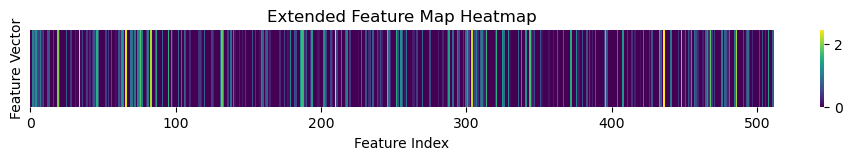

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ResNet152v2 model pre-trained on ImageNet, excluding the final classification layers
base_model = ResNet152V2(weights='imagenet', include_top=False, pooling=None)

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce spatial dimensions
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(512, activation='relu')(x)  # Another fully connected layer
custom_model = Model(inputs=base_model.input, outputs=x)

def extract_features(image_path, model):
    """Extract features from an image using the extended model."""
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust target_size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)
    
    # Extract features
    features = model.predict(img_array)
    return features

def plot_features(features):
    """Plot the extracted features as a heatmap."""
    # Convert features to 1D array
    features_1d = features.flatten()
    
    # Reshape features for heatmap (optional, for visualization purposes)
    features_reshaped = features_1d.reshape((1, -1))
    
    # Create a heatmap
    plt.figure(figsize=(12, 1))
    sns.heatmap(features_reshaped, cmap='viridis', cbar=True, xticklabels=100, yticklabels=False)
    plt.title('Extended Feature Map Heatmap')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Vector')
    plt.show()

# Example usage
image_path = '002.jpeg'
features = extract_features(image_path, custom_model)
print(features)

# Plot the features
plot_features(features)


final preprocessing stage

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.00000000e+00 0.00000000e+00 1.34097648e+00 0.00000000e+00
  3.28063726e-01 5.13578117e-01 9.64107871e-01 0.00000000e+00
  3.86922896e-01 2.16012105e-01 6.82543367e-02 0.00000000e+00
  2.28794336e-01 0.00000000e+00 1.06978106e+00 1.17479599e+00
  0.00000000e+00 2.98453569e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.32294387e-01 6.32837772e-01 0.00000000e+00
  1.00975943e+00 0.00000000e+00 4.94901538e-01 3.48022848e-01
  1.13897979e-01 1.77350342e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.00607017e-01 0.00000000e+00 4.00695235e-01
  0.00000000e+00 7.89726734e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.10961688e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.35785770e+00 4.67282116e-01 1.75389075e+00
  3.93040031e-02 0.00000000e+00 2.17182279e+00 0.00000000e+00
  8.82430524e-02 1.59598494e+00 2.

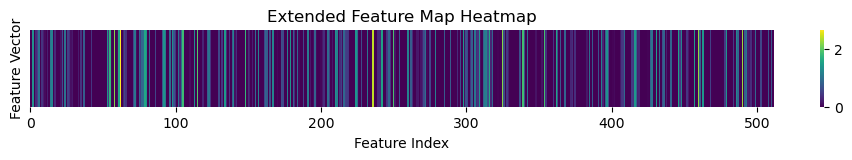

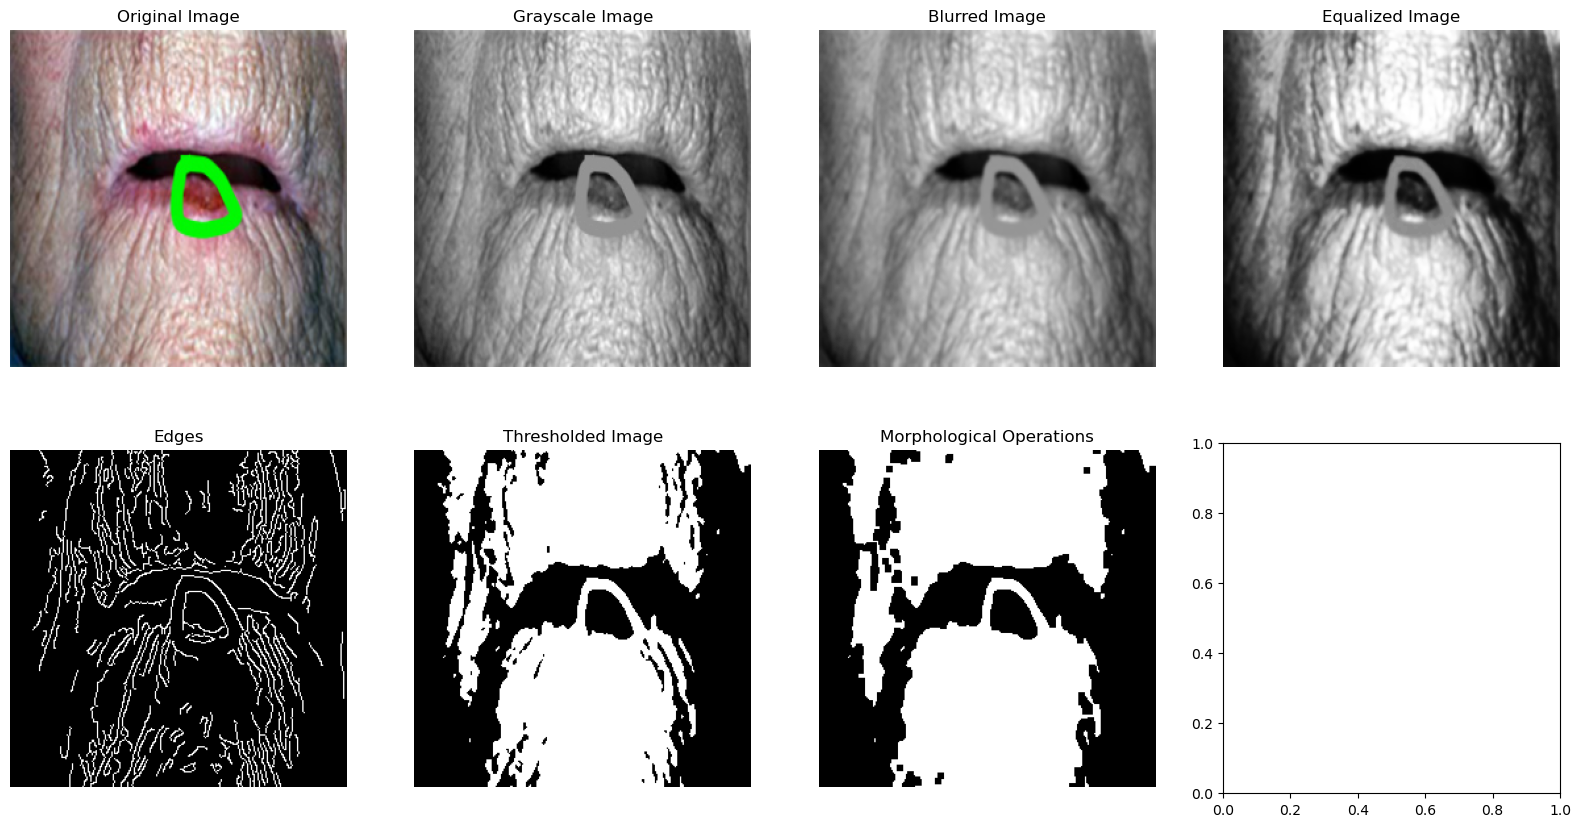

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from sklearn.model_selection import train_test_split

# Custom image preprocessing functions
def load_image(image_path):
    """Load an image from a file path."""
    return cv2.imread(image_path)

def resize_image(image, size=(256, 256)):
    """Resize the image to the specified size."""
    return cv2.resize(image, size)

def convert_to_grayscale(image):
    """Convert the image to grayscale."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_gaussian_blur(image, kernel_size=(5, 5)):
    """Apply Gaussian blur to the image."""
    return cv2.GaussianBlur(image, kernel_size, 0)

def histogram_equalization(image):
    """Apply histogram equalization to enhance contrast."""
    return cv2.equalizeHist(image)

def edge_detection(image):
    """Apply Canny edge detection."""
    return cv2.Canny(image, 100, 200)

def thresholding(image, threshold_value=127):
    """Apply binary thresholding to separate regions of interest."""
    _, thresh_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

def morphological_operations(image):
    """Apply morphological operations to refine regions."""
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    return eroded

def preprocess_image(image_path):
    """Preprocess the image for ResNet152V2."""
    img = load_image(image_path)
    img = resize_image(img, size=(224, 224))  # Resize to match ResNet152V2 input size
    img_array = img.astype(np.float32)  # Convert to float
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
    return img_array

# Define and compile the model
def create_model():
    """Create a neural network model."""
    base_model = ResNet152V2(weights='imagenet', include_top=False, pooling=None)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)  # Assuming binary classification
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def load_and_preprocess_data(image_paths, labels):
    """Load and preprocess data."""
    images = []
    for path in image_paths:
        img_array = preprocess_image(path)
        images.append(img_array[0])
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load data
image_paths = ['002.jpeg', '003.jpeg']  # List your image paths here
labels = [0, 1]  # Corresponding labels for binary classification

# Preprocess data
X, y = load_and_preprocess_data(image_paths, labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Save the model
model.save('image_classification_model.h5')

# Visualize results (if needed)
def plot_image(image_array, title="Image"):
    """Plot an image using matplotlib."""
    plt.imshow(image_array)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage for visualizing an image
plot_image(X_test[0], title="Example Test Image")


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Paths
image_dir = 'data/final_out/'
label_dir = 'data/label/'

# Load labels
def load_labels(label_dir):
    labels = []
    label_files = sorted(os.listdir(label_dir))
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as f:
            label = f.read().strip()
            labels.append(label)
    return labels

labels = load_labels(label_dir)
unique_labels = list(set(labels))
label_encoder = LabelEncoder()
label_encoder.fit(unique_labels)
encoded_labels = label_encoder.transform(labels)

# Create a balanced dataset
def load_and_preprocess_images(image_dir, labels, label_encoder):
    images = []
    image_labels = []
    for class_name in os.listdir(image_dir):
        class_dir = os.path.join(image_dir, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (224, 224))  # Resize to match ResNet input size
            image = image.astype('float32') / 255.0  # Normalize
            images.append(image)
            image_labels.append(label_encoder.transform([class_name])[0])
    return np.array(images), np.array(image_labels)

images, image_labels = load_and_preprocess_images(image_dir, labels, label_encoder)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, image_labels, test_size=0.2, random_state=42, stratify=image_labels)

# Create a model
def create_model(num_classes):
    base_model = ResNet152V2(weights='imagenet', include_top=False, pooling=None, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

num_classes = len(unique_labels)
model = create_model(num_classes)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=20)
test_datagen = ImageDataGenerator()

# Training the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=test_datagen.flow(X_test, y_test, batch_size=32),
    epochs=10,
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
